## Используемые библиотеки

In [1]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('passengers.csv', index_col='Month')
df.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


**Задание 1**

Посчитать по датасету passengers автокорреляционную функцию (acf) вручную (с помощью shift()) – от lag 1 до lag 50. Построить график для acf.

In [3]:
def calc_acf(series, max_lag=50):
    result = []
    
    for lag in range(1, max_lag + 1):
        shifted_series = series.shift(lag)
        autocorr = series.corr(shifted_series)
        result.append(autocorr)
        
    return result

In [4]:
acf_values = calc_acf(df['#Passengers'])

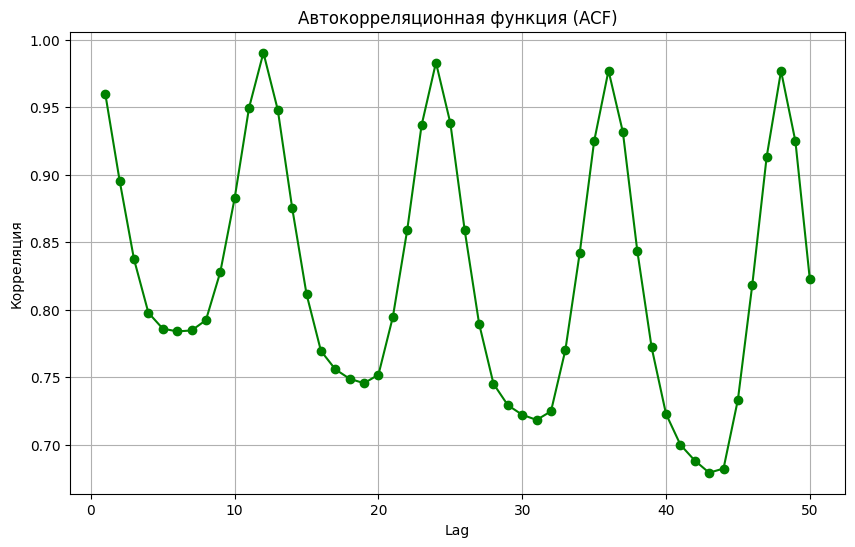

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), acf_values, marker='o', linestyle='-', color='g')
plt.title('Автокорреляционная функция (ACF)')
plt.xlabel('Lag')
plt.ylabel('Корреляция')
plt.grid(True)
plt.show()

**Задание 2**

Построить график для acf, используя фукции:

from statsmodels.grafics.tsaplots import plot_acf

plot_acf(passengers)

Сравнить график с графиком из задания 1.

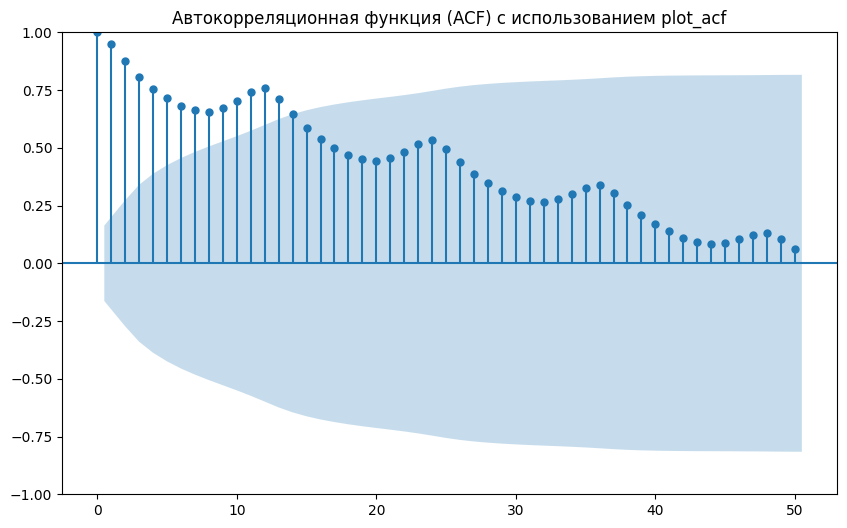

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(df['#Passengers'], lags=50, ax=ax)
plt.title('Автокорреляционная функция (ACF) с использованием plot_acf')
plt.show()

**Задание 3**

Сделать то же, что и в заданиях 1, 2 на датасете births.

In [8]:
df2 = pd.read_csv('births.csv', index_col='Date')
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [9]:
acf_values2 = calc_acf(df2['Births'])

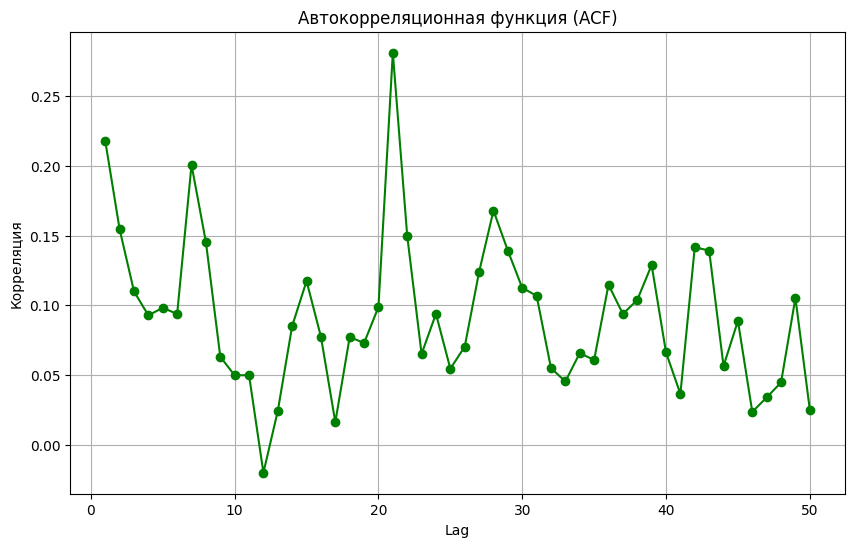

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), acf_values2, marker='o', linestyle='-', color='g')
plt.title('Автокорреляционная функция (ACF)')
plt.xlabel('Lag')
plt.ylabel('Корреляция')
plt.grid(True)
plt.show()

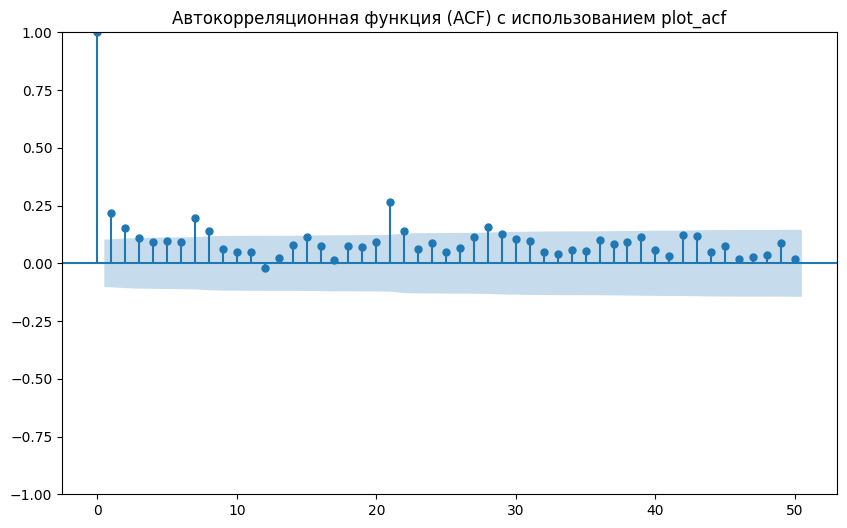

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(df2['Births'], lags=50, ax=ax)
plt.title('Автокорреляционная функция (ACF) с использованием plot_acf')
plt.show()

**Задание 4**

Построить значения функции sin x на отрезке [0, 50] с интервалом 0,1. Сделать то же, что и в заданиях 1, 2, использовать 100 лагов. Посмотреть на значение acf.

In [12]:
x = np.arange(0, 50, 0.1)
y = np.sin(x)

df_sin = pd.DataFrame({'x': x, 'y': y})

In [13]:
sin_acf_values = calc_acf(df_sin['y'], max_lag=100)

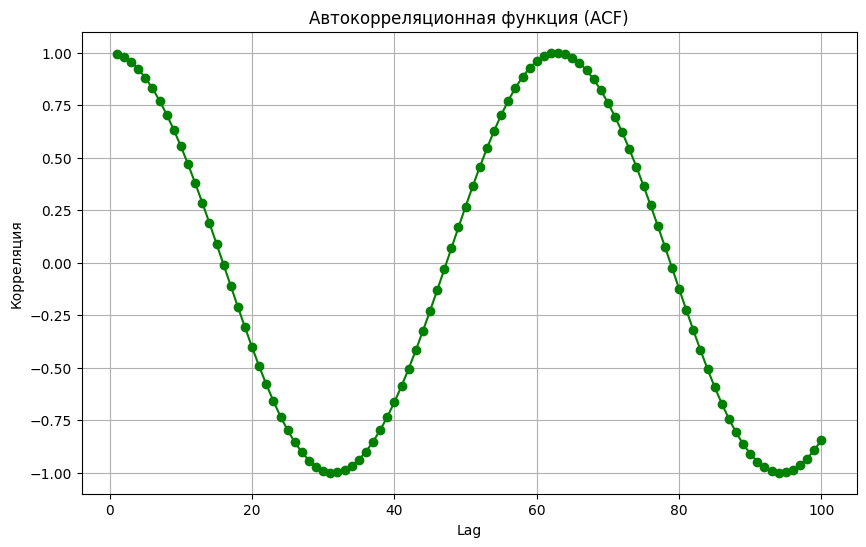

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), sin_acf_values, marker='o', linestyle='-', color='g')
plt.title('Автокорреляционная функция (ACF)')
plt.xlabel('Lag')
plt.ylabel('Корреляция')
plt.grid(True)
plt.show()

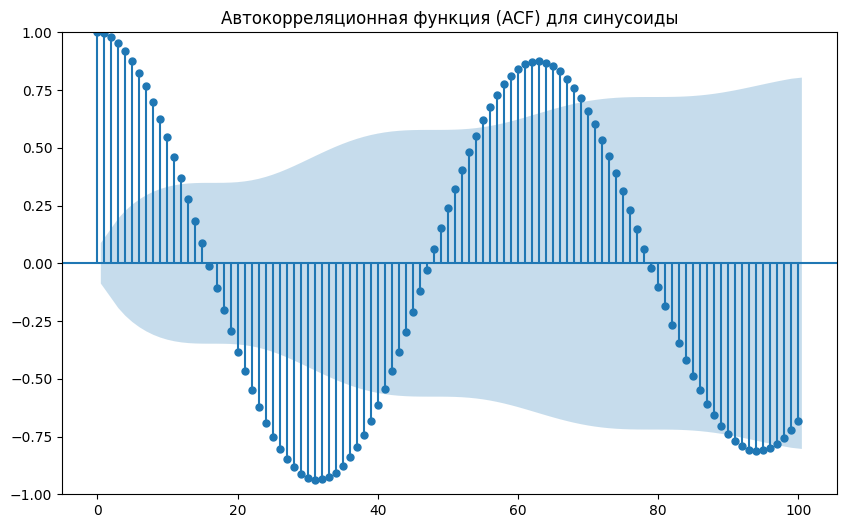

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(y, lags=100, ax=ax)
plt.title('Автокорреляционная функция (ACF) для синусоиды')
plt.show()

**Задание 5**

(задание на повторение) Исследовать датасет births на стационарность – провести тест Дики-Фуллера (как в ЛР4).

In [16]:
data = pd.read_csv('Births.csv')
data.rename(columns={'#PBirths': 'births'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date']) 
data.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [20]:
births = data['Births']
adfuller_test_result_df = adfuller(births)
p_value_df = adfuller_test_result_df[1]
print(f'p-value = {p_value_df:.20f}')

p-value = 0.00005243412990149865


In [21]:
print(f'ADF Statistic: {adfuller_test_result_df[0]}')
print(f'p-value: {adfuller_test_result_df[1]}')
for key, value in adfuller_test_result_df[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Statistic: -4.808291253559763
p-value: 5.243412990149865e-05
Critical Value (1%): -3.448748905151901
Critical Value (5%): -2.8696473721448728
Critical Value (10%): -2.5710891239349585
